In [15]:
import os
import sys
import json
from collections import defaultdict
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.patches import Polygon, Rectangle, FancyBboxPatch
from matplotlib import patheffects
from matplotlib.collections import PatchCollection
import matplotlib.gridspec as gridspec

sys.path.append('..')
from tools import get_shapes, rgb2rgba

### Figure 1. Representation of our dataset 

In [16]:
images_by_categories = {
    'Structure (with temporary)': [
        '10000000.jpg', '10000351.jpg', '00002400.jpg', '10000000.jpg', 
        '10000000.jpg', '10000000.jpg', '10000000.jpg', '10000000.jpg', ],
    
    'Material and part': [
        '10000400.jpg', '10000400.jpg', '10000000.jpg', '10000000.jpg', 
        '10000000.jpg', '10000000.jpg', '10000000.jpg', '10000000.jpg', ],
    
    'Heavy equipment': [
        '00000961.jpg', '00000963.jpg', '00001527.jpg', '00002982.jpg', 
        '00002306.jpg', '00002548.jpg', '00002978.jpg', '10000000.jpg', ],
    
    'Object': [
        '00000911.jpg', '00000979.jpg', '10000250.jpg', '00000955.jpg', 
        '00001906.jpg', '00002336.jpg', '10000351.jpg', '00002339.jpg']
}

In [17]:
def concat_horizon(root='../images/', images=None):
    width = 0
    dst = Image.new('RGB', (300*len(images), 300))
    for path in images:
        image = Image.open(os.path.join(root, path))
        image = image.resize((300, 300))
        
        dst.paste(image, (width, 0))
        width += image.width
#         dst.paste(im2, (im1.width, 0))
        
    return dst

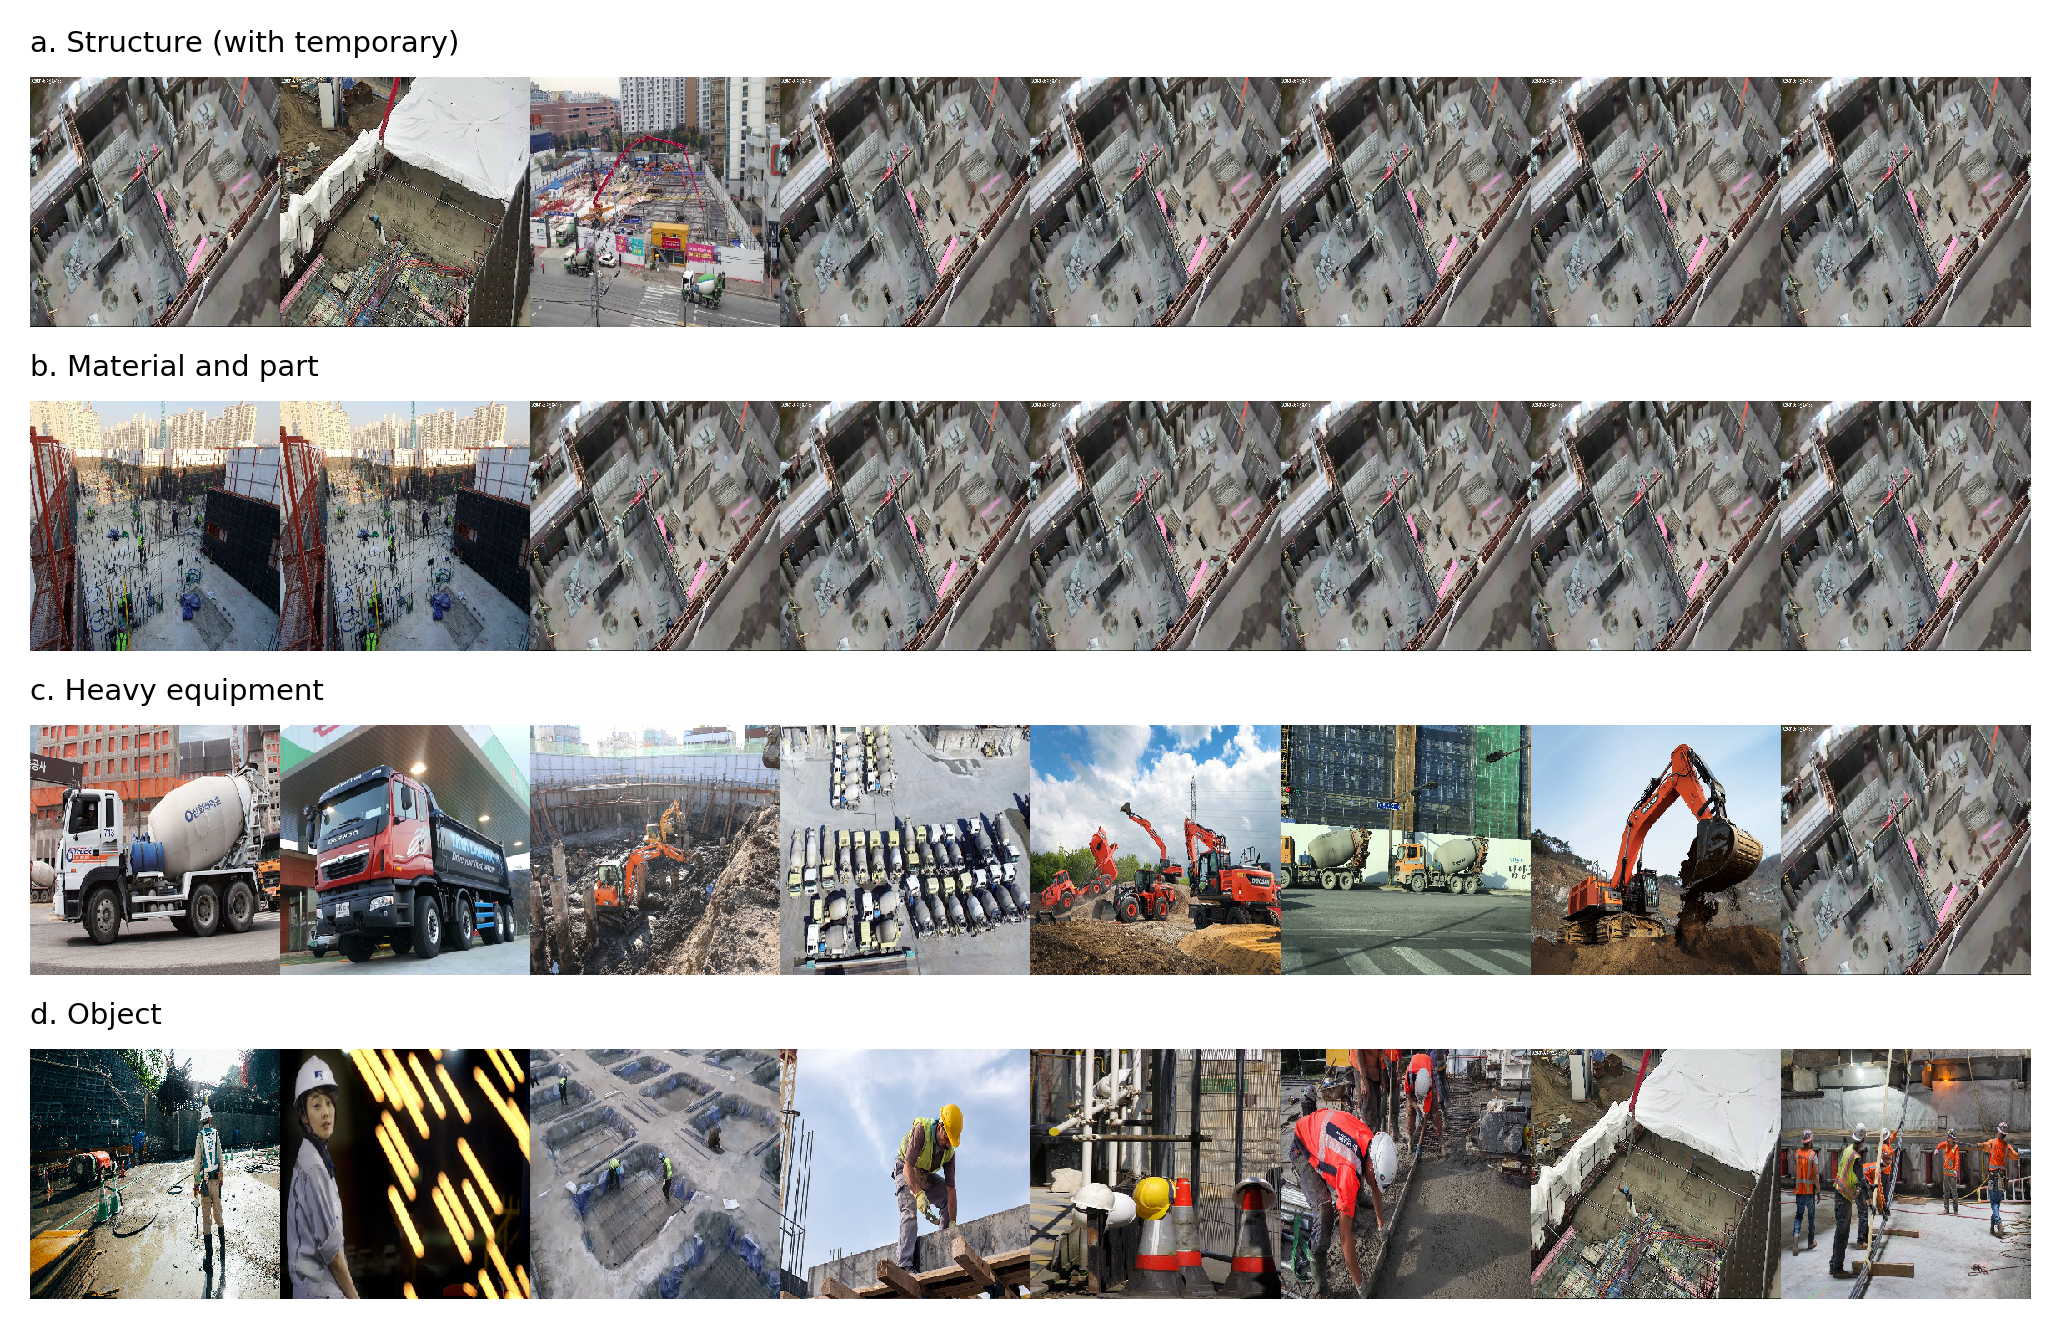

In [18]:
fig, axes = plt.subplots(4, 1, figsize=(7,4.5), dpi=300)

s = ['a', 'b', 'c', 'd']
for i, (k, v) in enumerate(images_by_categories.items()):
    axes.flat[i].imshow(concat_horizon(images=v))
    axes.flat[i].axis('off')
    axes.flat[i].set_title(f'{s[i]}. {k}', fontsize=7, loc='left') # , weight='bold'
    
fig.tight_layout()
plt.show()
fig.savefig('./outputs/fig-0102.png', bbox_inches='tight')

### Figure 2. Difference between bounding box and polygon

In [19]:
shapes = get_shapes('../images/10000351.json', xywh=True)

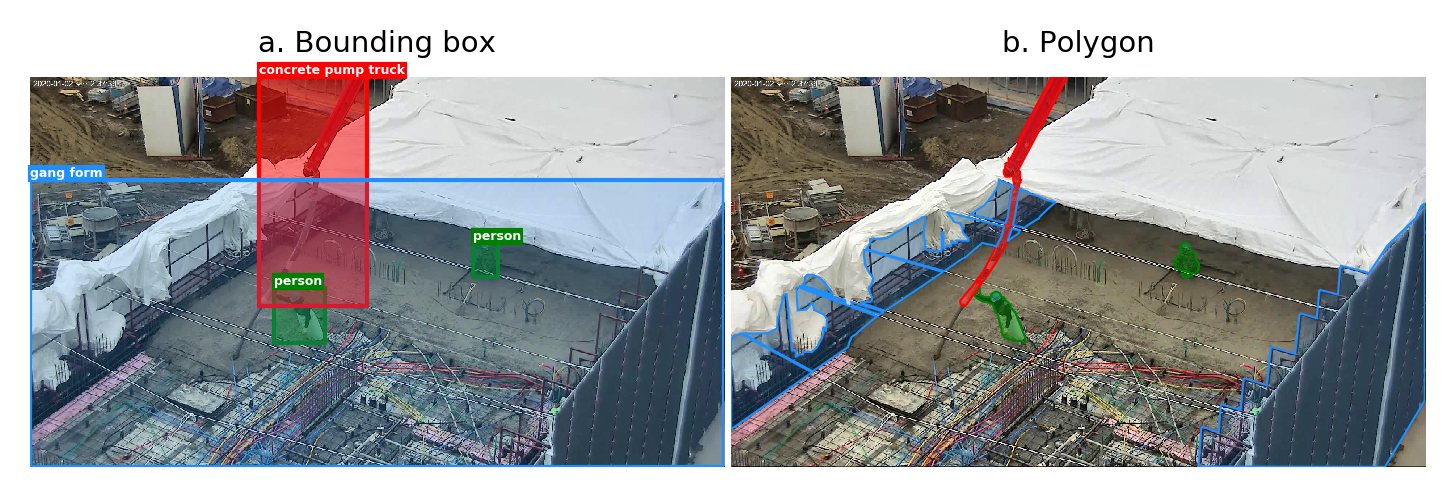

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=300)

colors_map = {
    'gang form': rgb2rgba((30, 144, 255), 0.2),
    'person': rgb2rgba((0, 128, 0), 0.5),
    'support': rgb2rgba((138, 43, 226), 0.5),
    'hardhat': rgb2rgba((255, 255, 0), 0.5),
    'pallet': rgb2rgba((255, 95, 119), 0.5),
    'concrete pump truck': rgb2rgba((255, 0, 0), 0.5)
}

image = Image.open('../images/10000351.jpg')
ax1.imshow(image)
for shape in shapes['boxes']:
    if shape['label'] in ['person', 'gang form', 'concrete pump truck']:
        box = shape['points']
        color = colors_map.get(shape['label'], 1)
        rectangle = Rectangle((box[0], box[1]), box[2], box[3], fc=color[0], ec=color[1])
        ax1.add_patch(rectangle)
        
        ax1.annotate(
            shape['label'], (box[0], box[1]), color='w', weight='bold', 
            fontsize=3, ha='left', va='bottom', 
            bbox=dict(facecolor=color[1], edgecolor=color[1], pad=0.0))
        
ax2.imshow(image)
for shape in shapes['polygons']:
    if shape['label'] in ['person', 'gang form', 'concrete pump truck']:
        color = colors_map.get(shape['label'], 1)
        points = np.asarray(shape['points'])
        polygon = Polygon(points, True, fc=color[0], ec=color[1], lw=0.5)
        ax2.add_patch(polygon)

ax1.axis('off')
ax2.axis('off')
ax1.set_title('a. Bounding box', fontsize=7)
ax2.set_title('b. Polygon', fontsize=7)
fig.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()
fig.savefig('./outputs/fig-0103.png', bbox_inches='tight')

### Figure 3. 